In [11]:
import numpy as np

In [12]:
import pandas as pd

In [13]:
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("cyber_crimes.csv")
df.head()

,S. No,Category,State/UT,2016,2017,2018,Percentage Share of State/UT (2018),Mid-Year Projected Population (in Lakhs) (2018)+,Rate of Total Cyber Crimes (2018)++
0,1,State,Andhra Pradesh,616.0,931.0,1207.0,4.4,520.3,2.3
1,2,State,Arunachal Pradesh,4.0,1.0,7.0,0.0,14.9,0.5
2,3,State,Assam,696.0,1120.0,2022.0,7.4,340.4,5.9
3,4,State,Bihar,309.0,433.0,374.0,1.4,1183.3,0.3
4,5,State,Chhattisgarh,90.0,171.0,139.0,0.5,284.7,0.5


In [15]:
df.shape  

(42, 9)

In [18]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   S. No                                             39 non-null     object 
 1   Category                                          39 non-null     object 
 2   State/UT                                          39 non-null     object 
 3   2016                                              39 non-null     float64
 4   2017                                              39 non-null     float64
 5   2018                                              39 non-null     float64
 6   Percentage Share of State/UT (2018)               39 non-null     float64
 7   Mid-Year Projected Population (in Lakhs) (2018)+  39 non-null     float64
 8   Rate of Total Cyber Crimes (2018)++               39 non-null     float64
dtypes: float64(6), object(3)

In [19]:
df.describe() 

,2016,2017,2018,Percentage Share of State/UT (2018),Mid-Year Projected Population (in Lakhs) (2018)+,Rate of Total Cyber Crimes (2018)++
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,947.461538,1676.615385,2096.000000,7.689744,1017.987179,1.689744
std,2724.974532,4832.658115,6065.161416,22.257391,2885.991893,1.811193
min,0.000000,0.000000,0.000000,0.000000,0.700000,0.000000
25%,9.500000,11.500000,24.500000,0.100000,18.300000,0.500000
50%,102.000000,176.000000,239.000000,0.900000,284.000000,1.000000
75%,439.500000,772.000000,886.500000,3.250000,663.850000,2.200000
max,12317.000000,21796.000000,27248.000000,100.000000,13233.800000,8.900000


In [20]:
df.isnull().sum()
df = df.fillna(0)  

In [21]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("+","").str.replace("++","")
df.head()

,s._no,category,state/ut,2016,2017,2018,percentage_share_of_state/ut_(2018),mid-year_projected_population_(in_lakhs)_(2018),rate_of_total_cyber_crimes_(2018)
0,1,State,Andhra Pradesh,616.0,931.0,1207.0,4.4,520.3,2.3
1,2,State,Arunachal Pradesh,4.0,1.0,7.0,0.0,14.9,0.5
2,3,State,Assam,696.0,1120.0,2022.0,7.4,340.4,5.9
3,4,State,Bihar,309.0,433.0,374.0,1.4,1183.3,0.3
4,5,State,Chhattisgarh,90.0,171.0,139.0,0.5,284.7,0.5


In [22]:
df.isnull().sum()

s._no                                              0
category                                           0
state/ut                                           0
2016                                               0
2017                                               0
2018                                               0
percentage_share_of_state/ut_(2018)                0
mid-year_projected_population_(in_lakhs)_(2018)    0
rate_of_total_cyber_crimes_(2018)                  0
dtype: int64

# analysis & visualization

## Year-wise Trend (India Total)

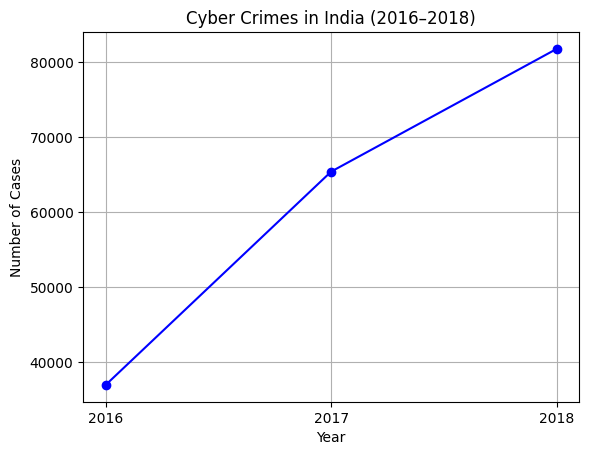

In [23]:
import matplotlib.pyplot as plt

# total crimes by year
yearly_trend = df[["2016", "2017", "2018"]].sum()

plt.plot(yearly_trend.index, yearly_trend.values, marker="o", color="blue")
plt.title("Cyber Crimes in India (2016–2018)")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.grid(True)
plt.show()

## Top 5 States (2018)

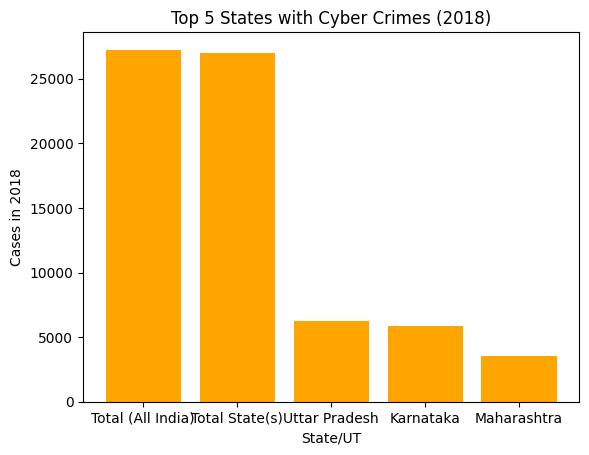

In [24]:
top_states = df.sort_values("2018", ascending=False).head(5)

plt.bar(top_states["state/ut"], top_states["2018"], color="orange")
plt.title("Top 5 States with Cyber Crimes (2018)")
plt.xlabel("State/UT")
plt.ylabel("Cases in 2018")
plt.show()


## State-wise Comparison Across Years

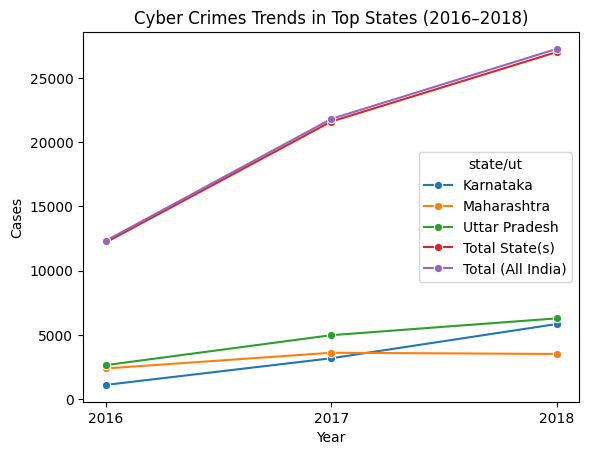

In [25]:
import seaborn as sns

# select a few major states for clarity
states_to_plot = df.sort_values("2018", ascending=False).head(5)["state/ut"]

subset = df[df["state/ut"].isin(states_to_plot)]
subset = subset.melt(id_vars="state/ut", value_vars=["2016","2017","2018"], var_name="Year", value_name="Cases")

sns.lineplot(data=subset, x="Year", y="Cases", hue="state/ut", marker="o")
plt.title("Cyber Crimes Trends in Top States (2016–2018)")
plt.show()


## Crime Rate Per Lakh Population (2018)

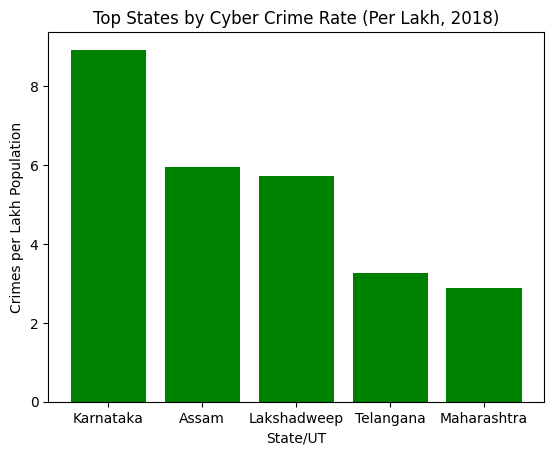

In [26]:
df["crime_rate_calc"] = df["2018"] / df["mid-year_projected_population_(in_lakhs)_(2018)"]

top_rate = df.sort_values("crime_rate_calc", ascending=False).head(5)

plt.bar(top_rate["state/ut"], top_rate["crime_rate_calc"], color="green")
plt.title("Top States by Cyber Crime Rate (Per Lakh, 2018)")
plt.xlabel("State/UT")
plt.ylabel("Crimes per Lakh Population")
plt.show()


### Insight 1: Overall Trend of Cyber Crimes in India (2016–2018)
 This insight shows the total number of cyber crimes in India over the three years.  
We calculate the total for each year to observe the growth trend.

Total cyber crimes increased from 36951.0 in 2016 to 81744.0 in 2018, a 121.22% increase.


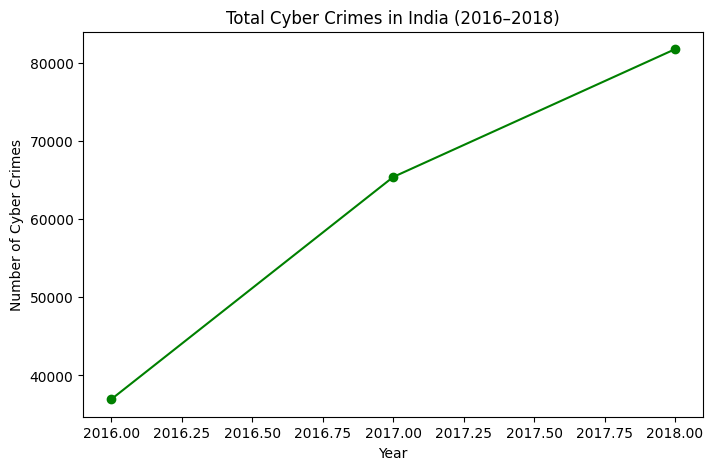

In [27]:
# Total cyber crimes each year
total_2016 = df['2016'].sum()
total_2017 = df['2017'].sum()
total_2018 = df['2018'].sum()

# Percentage increase 2016 -> 2018
percent_increase = ((total_2018 - total_2016) / total_2016) * 100

print(f"Total cyber crimes increased from {total_2016} in 2016 to {total_2018} in 2018, a {percent_increase:.2f}% increase.")

# Line chart
plt.figure(figsize=(8,5))
plt.plot([2016, 2017, 2018], [total_2016, total_2017, total_2018], marker='o', color='green')
plt.title('Total Cyber Crimes in India (2016–2018)')
plt.xlabel('Year')
plt.ylabel('Number of Cyber Crimes')
plt.show()


### Insight 2: Top 5 States with Highest Cyber Crimes in 2018
This insight highlights the states that reported the highest number of cyber crimes in 2018.  
These top 5 states account for a significant portion of total cyber crimes.

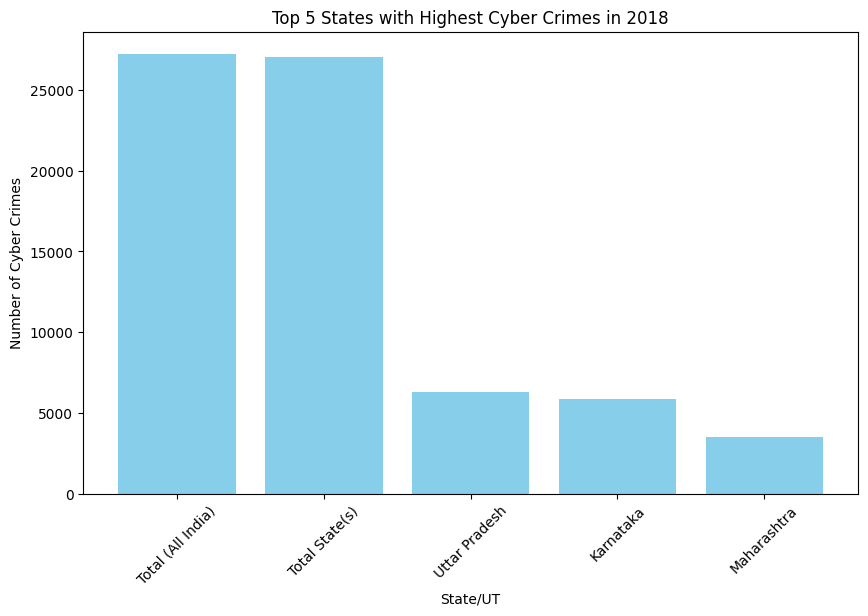

In [29]:
top5_states = df[['state/ut', '2018']].sort_values(by='2018', ascending=False).head(5)
top5_states

# Bar chart
plt.figure(figsize=(10,6))
plt.bar(top5_states['state/ut'], top5_states['2018'], color='skyblue')
plt.title('Top 5 States with Highest Cyber Crimes in 2018')
plt.xlabel('State/UT')
plt.ylabel('Number of Cyber Crimes')
plt.xticks(rotation=45)
plt.show()


### Insight 3: Fastest Growing States (2016–2018)

This insight identifies states with the highest percentage increase in cyber crimes between 2016 and 2018.

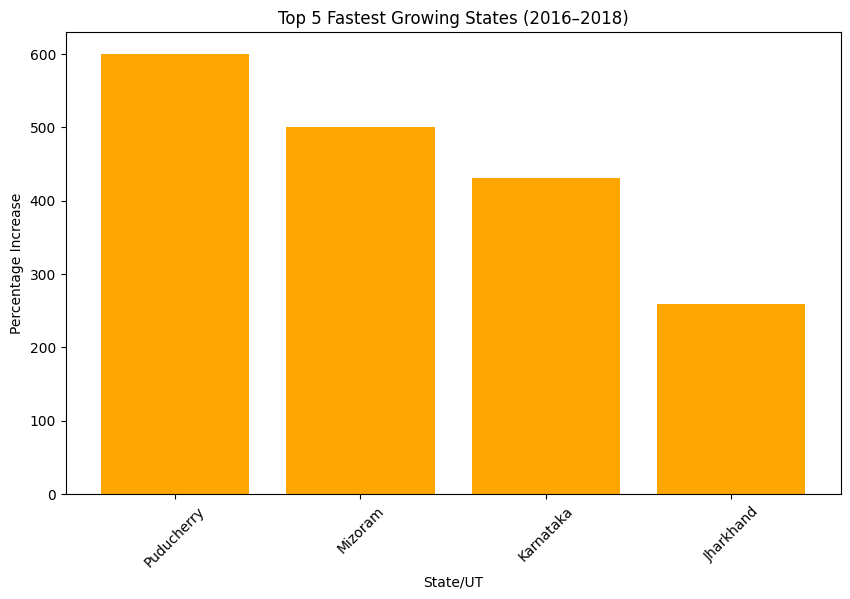

In [31]:
# Calculate % increase per state
df['% Increase'] = ((df['2018'] - df['2016']) / df['2016']) * 100

# Top 5 fastest growing states
fastest_growing = df[['state/ut', '% Increase']].sort_values(by='% Increase', ascending=False).head(5)
fastest_growing

# Bar chart
plt.figure(figsize=(10,6))
plt.bar(fastest_growing['state/ut'], fastest_growing['% Increase'], color='orange')
plt.title('Top 5 Fastest Growing States (2016–2018)')
plt.xlabel('State/UT')
plt.ylabel('Percentage Increase')
plt.xticks(rotation=45)
plt.show()


### Insight 4: Per-Capita Cyber Crime Rate (2018)

This insight compares cyber crimes relative to the population of each state in 2018.  
It helps identify regions with high crime concentration, even if total cases are lower.

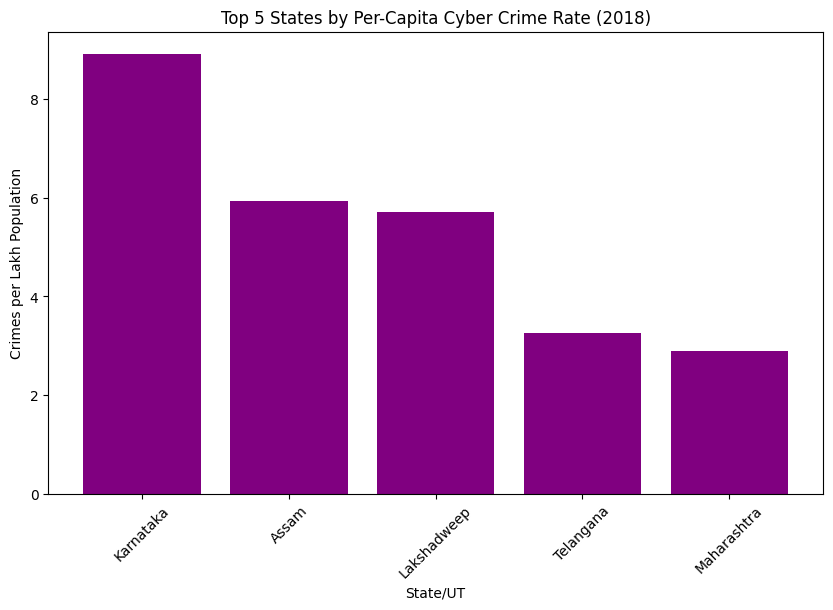

In [35]:
# Calculate crimes per lakh population
df['Crimes per Lakh'] = df['2018'] / df['Mid-Year Projected Population (in Lakhs) (2018)+']

# Top 5 states by per-capita rate
top_per_capita = df[['State/UT', 'Crimes per Lakh']].sort_values(by='Crimes per Lakh', ascending=False).head(5)
top_per_capita

# Bar chart
plt.figure(figsize=(10,6))
plt.bar(top_per_capita['State/UT'], top_per_capita['Crimes per Lakh'], color='purple')
plt.title('Top 5 States by Per-Capita Cyber Crime Rate (2018)')
plt.xlabel('State/UT')
plt.ylabel('Crimes per Lakh Population')
plt.xticks(rotation=45)
plt.show()


### Insight 5: Percentage Share of Each State (2018)

This insight visualizes how much each state contributed to the total cyber crimes in 2018.


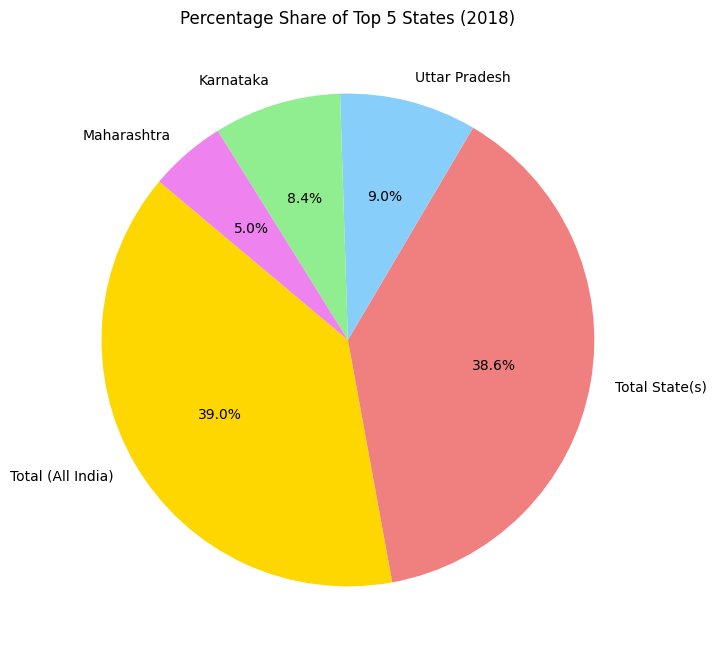

In [39]:
# Pie chart for top 5 states
plt.figure(figsize=(8,8))
plt.pie(top5_states['2018'], labels=top5_states['state/ut'], autopct='%1.1f%%', startangle=140, colors=['gold','lightcoral','lightskyblue','lightgreen','violet'])
plt.title('Percentage Share of Top 5 States (2018)')
plt.show()


# 🎯 Conclusion

The analysis reveals that cyber crimes in India are on a rising trajectory.  
While larger states dominate in absolute numbers, **per-capita and growth rate analysis reveal hidden vulnerabilities in smaller states**.  

This suggests that both **high-population states and smaller regions** require tailored cyber security awareness campaigns and stronger enforcement measures.

👨‍💻 **Author**: Suresh S  
📂 **Portfolio Project**: Cyber Crime Analysis (2016–2018)  
📌 **Tools Used**: Python, Pandas, Matplotlib, Jupyter Notebook  